#### Objective: Develop machine learning models that can predict whether a employee seek treatment or not. 
#### Database: This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk(r'H:\Python Committee\Python Machine Learning Presentation\mental health survey'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

H:\Python Committee\Python Machine Learning Presentation\mental health survey\humanhead.png
H:\Python Committee\Python Machine Learning Presentation\mental health survey\images.jpg
H:\Python Committee\Python Machine Learning Presentation\mental health survey\survey.csv
H:\Python Committee\Python Machine Learning Presentation\mental health survey\Thumbs.db


In [80]:
# pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org plotly

In [3]:
df = pd.read_csv(r'H:\Python Committee\Python Machine Learning Presentation\mental health survey\survey.csv')

In [4]:
# List all varibles in the dataset and determine the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
# Check missing data
# Convert all columns to lowercase
df.columns = df.columns.str.lower()
# check percentage of missing
round((df.isna().sum()/df.shape[0])*100,2).sort_values(ascending=False)

comments                     86.97
state                        40.91
work_interfere               20.97
self_employed                 1.43
benefits                      0.00
age                           0.00
gender                        0.00
country                       0.00
family_history                0.00
treatment                     0.00
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
care_options                  0.00
obs_consequence               0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
timestamp                     0.00
dtype: float64

In [6]:
df['country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Italy                       7
Poland                      7
Sweden                      7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Bulgaria                    4
Singapore                   4
Mexico                      3
Finland                     3
Russia                      3
Austria                     3
Denmark                     2
Portugal                    2
Greece                      2
Croatia                     2
Colombia                    2
Bosnia and Herzegovina      1
Moldova                     1
Uruguay                     1
Latvia                      1
Czech Repu

In [7]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

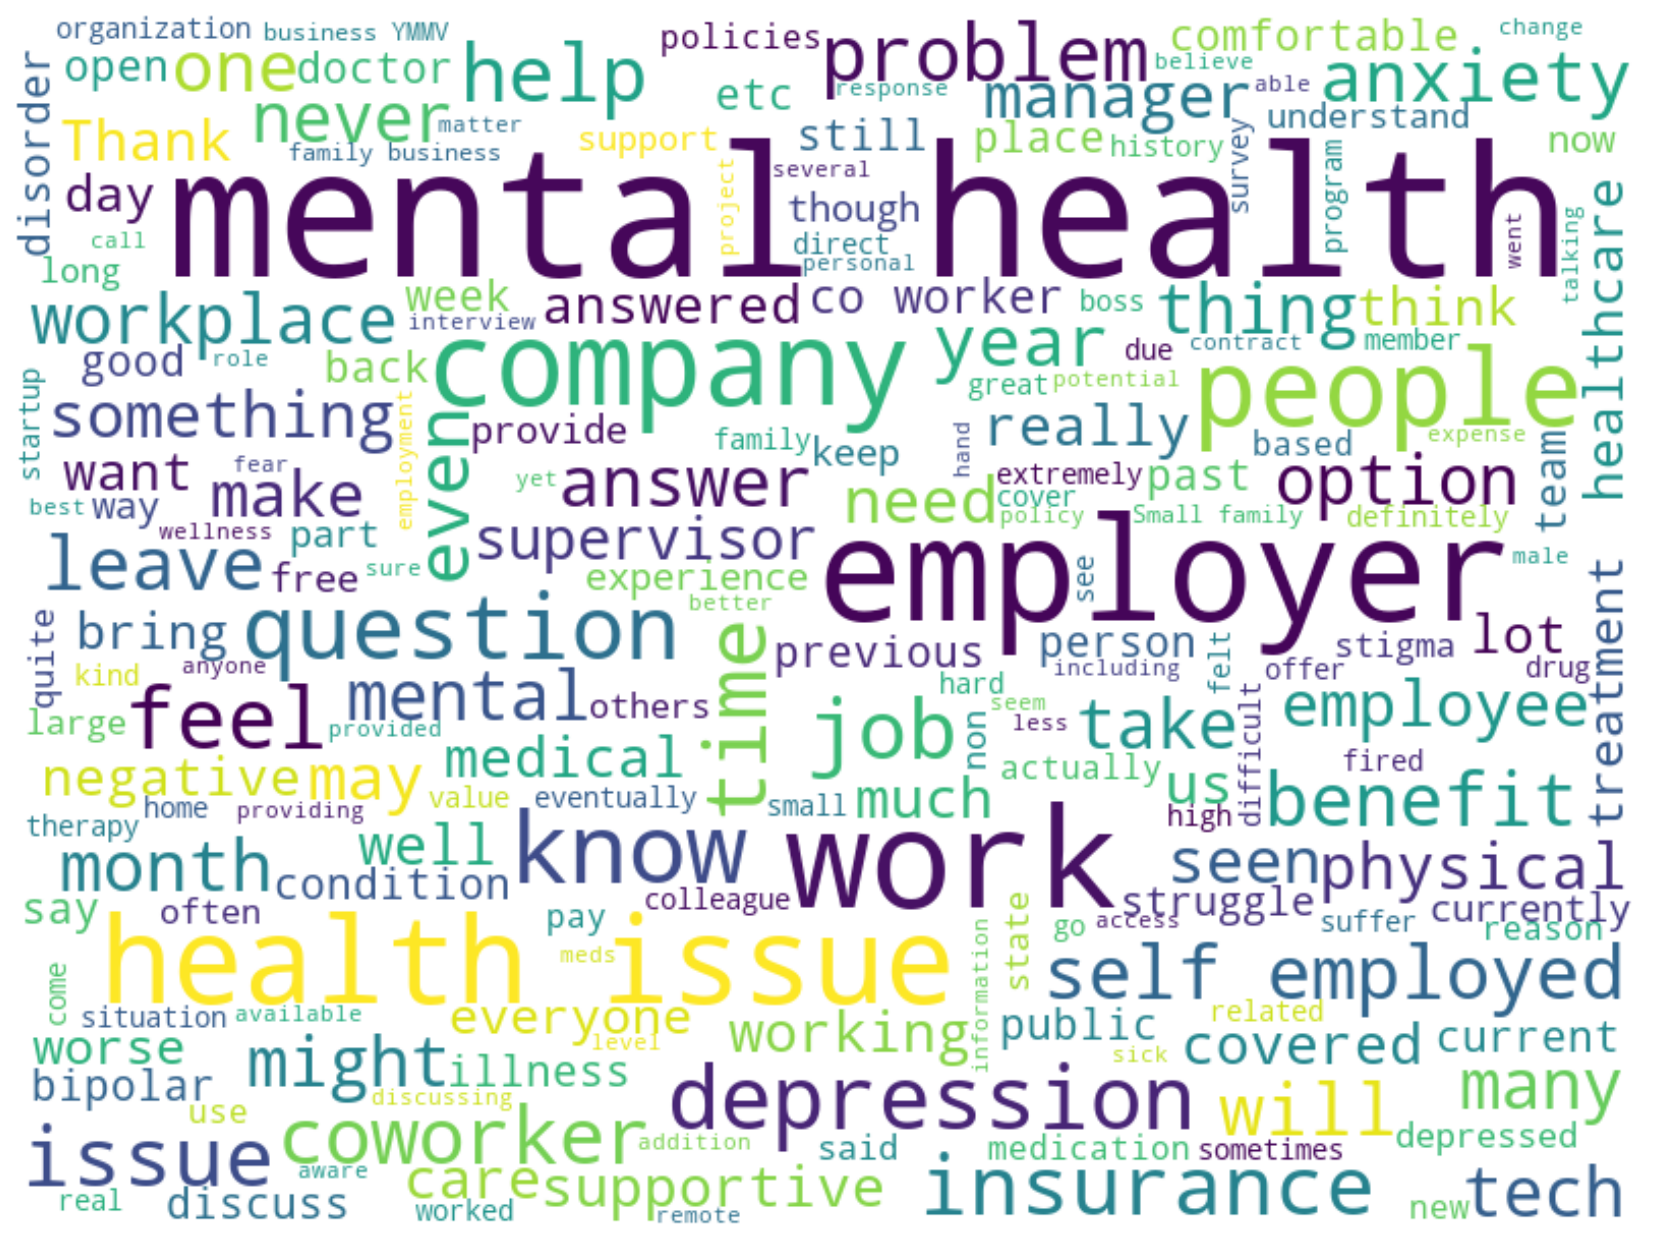

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

words = ''.join(df['comments'].dropna())


plt.figure(figsize=(14,14), dpi=150)

wordcloud = WordCloud(max_words=200,
                       stopwords = STOPWORDS,
                       background_color = "white",
                       mask = np.array(Image.open(r"H:\Python Committee\Python Machine Learning Presentation\mental health survey\humanhead.png")),
                       contour_color='#023075',
                       contour_width=1,
                       width=1500, height=800).generate(words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

In [9]:
df = df.drop(['country','state','timestamp','comments'], axis = 1)

In [10]:
round(df.describe(include='all'),2)

age gender self_employed family_history treatment  \
count   1.259000e+03   1259          1241           1259      1259   
unique           NaN     49             2              2         2   
top              NaN   Male            No             No       Yes   
freq             NaN    615          1095            767       637   
mean    7.942815e+07    NaN           NaN            NaN       NaN   
std     2.818299e+09    NaN           NaN            NaN       NaN   
min    -1.726000e+03    NaN           NaN            NaN       NaN   
25%     2.700000e+01    NaN           NaN            NaN       NaN   
50%     3.100000e+01    NaN           NaN            NaN       NaN   
75%     3.600000e+01    NaN           NaN            NaN       NaN   
max     1.000000e+11    NaN           NaN            NaN       NaN   

       work_interfere no_employees remote_work tech_company benefits  \
count             995         1259        1259         1259     1259   
unique              4            6           2            2        3   
top         Sometimes         6-25          No          Yes      Yes   
freq              465          290         883         1031      477   
mean              NaN          NaN         NaN          NaN      NaN   
std               NaN          NaN         NaN          NaN      NaN   
min               NaN          NaN         NaN          NaN      NaN   
25%               NaN          NaN         NaN          NaN      NaN   
50%               NaN          NaN         NaN          NaN      NaN   
75%               NaN          NaN         NaN          NaN      NaN   
max               NaN          NaN         NaN          NaN      NaN   

       care_options wellness_program seek_help   anonymity       leave  \
count          1259             1259      1259        1259        1259   
unique            3                3         3           3           5   
top              No               No        No  Don't know  Don't know   
freq            501              842       646         819         563   
mean            NaN              NaN       NaN         NaN         NaN   
std             NaN              NaN       NaN         NaN         NaN   
min             NaN              NaN       NaN         NaN         NaN   
25%             NaN              NaN       NaN         NaN         NaN   
50%             NaN              NaN       NaN         NaN         NaN   
75%             NaN              NaN       NaN         NaN         NaN   
max             NaN              NaN       NaN         NaN         NaN   

       mental_health_consequence phys_health_consequence     coworkers  \
count                       1259                    1259          1259   
unique                         3                       3             3   
top                           No                      No  Some of them   
freq                         490                     925           774   
mean                         NaN                     NaN           NaN   
std                          NaN                     NaN           NaN   
min                          NaN                     NaN           NaN   
25%                          NaN                     NaN           NaN   
50%                          NaN                     NaN           NaN   
75%                          NaN                     NaN           NaN   
max                          NaN                     NaN           NaN   

       supervisor mental_health_interview phys_health_interview  \
count        1259                    1259                  1259   
unique          3                       3                     3   
top           Yes                      No                 Maybe   
freq          516                    1008                   557   
mean          NaN                     NaN                   NaN   
std           NaN                     NaN                   NaN   
min           NaN                     NaN                   NaN 

In [11]:
df['gender'].value_counts().reset_index()

index  gender
0                                             Male     615
1                                             male     206
2                                           Female     121
3                                                M     116
4                                           female      62
5                                                F      38
6                                                m      34
7                                                f      15
8                                             Make       4
9                                            Woman       3
10                                           Male        3
11                                         Female        2
12                                             Man       2
13                                  Female (trans)       2
14                                        Cis Male       2
15                                       Androgyne       1
16  ostensibly male, unsure what that really means       1
17                                            Mail       1
18                                cis-female/femme       1
19                                      non-binary       1
20                                           fluid       1
21                                           queer       1
22                                           woman       1
23                                             All       1
24                        male leaning androgynous       1
25                                           maile       1
26                                     Trans woman       1
27                                          Femake       1
28                                        cis male       1
29                                         Agender       1
30                              A little about you       1
31                                    Female (cis)       1
32                                            Malr       1
33                                          Neuter       1
34                                        Male-ish       1
35                                     Genderqueer       1
36                                             Mal       1
37                                            Enby       1
38                                               p       1
39                                         Cis Man       1
40                                            msle       1
41                                  Guy (-ish) ^_^       1
42                                    Trans-female       1
43                                             Nah       1
44                                          femail       1
45                                  queer/she/they       1
46                           something kinda male?       1
47                                      Cis Female       1
48                                      Male (CIS)       1

Re-group the gender value:  
(1). (Male, or cis Male) = 'Male'; (2). (Female, or cis Female) = 'Female'; (3). Else: 'Other'

In [12]:
def standardize_gender(df):
    gender_list = df['gender'].tolist()
    standardized_list = []
    
    for gender in gender_list:
        if gender in ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                      'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make']:
            standardized_list.append('Male')
        elif gender in ['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                        'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                        'woman']:
            standardized_list.append('Female')
        else:
            standardized_list.append('Other')
    
    df['gender'] = standardized_list
    
    return df

In [13]:
my_modified_df = standardize_gender(df)

In [14]:
df['gender'].value_counts().reset_index()

index  gender
0    Male     991
1  Female     247
2   Other      21

In [15]:
df['age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [16]:
# Correct the outliers
# Let us treat age
df.loc[df.age<12,'age']=15
df.loc[df.age>75,'age']=75

<AxesSubplot:>

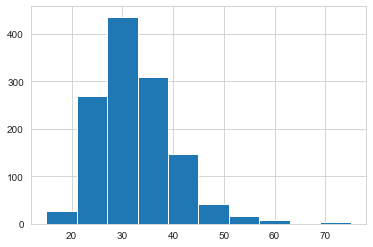

In [17]:
df['age'].hist()

In [18]:
df.isna().sum()

age                            0
gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [19]:
self_employed = pd.DataFrame(df['self_employed'].value_counts())
self_employed.style.applymap(lambda x : "background-color: #90EE90")

In [20]:
work_interfere = pd.DataFrame(df['work_interfere'].value_counts())
work_interfere.style.applymap(lambda x : "background-color: #90EE90")

In [21]:
#replacing NaN values because they are so few
df['self_employed'] = df['self_employed'].fillna('Don\'t know')
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )

In [22]:
# Calculate the number of missing values in each column
df.isna().sum()

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [23]:
df.sample(7).style.applymap(lambda x : "background-color: #ADD8E6")

In [24]:
# Univariate visualization of categorical variables

df_ = df.drop(['age'], axis=1)

buttons = []
i = 0
vis = [False] * 24

for col in df_.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 24

fig = go.Figure()

for col in df_.columns:
    fig.add_trace(go.Pie(
             values = df_[col].value_counts(),
             labels = df_[col].value_counts().index,
             title = dict(text = 'Distribution of {}'.format(col),
                          font = dict(size=12, family = 'Arial'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',))

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('pastel').as_hex(),
                              line=dict(color='#008080', width=1)))


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 1.15,
                        y = 0.85,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                             showarrow=False,
                             x = 1.06, y = 0.92, yref = "paper", align = "left")])

for i in range(1,22):
    fig.data[i].visible = False

fig.show()

In [25]:
male   = df[df.gender == 'Male'].drop(['gender', 'age'], axis=1)
female = df[df.gender == 'Female'].drop(['gender', 'age'], axis=1)
other  = df[df.gender == 'Other'].drop(['gender', 'age'], axis=1)

In [26]:
buttons = []
i = 0
vis = [False] * 21

for col in male.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 21

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in male.columns:
    fig.add_trace(go.Pie(
             values = male[col].value_counts(),
             labels = male[col].value_counts().index,
             title = dict(text = 'Male distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)
    
for col in female.columns:
    fig.add_trace(go.Pie(
             values = female[col].value_counts(),
             labels = female[col].value_counts().index,
             title = dict(text = 'Female distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)
    
   

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('bright').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('dark').as_hex(),
                              line=dict(color='#000000', width=1)))


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'monospace',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.62,
                        y = 0.91,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.5, y = 1, yref = "paper", align = "left")])

for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True

fig.show()

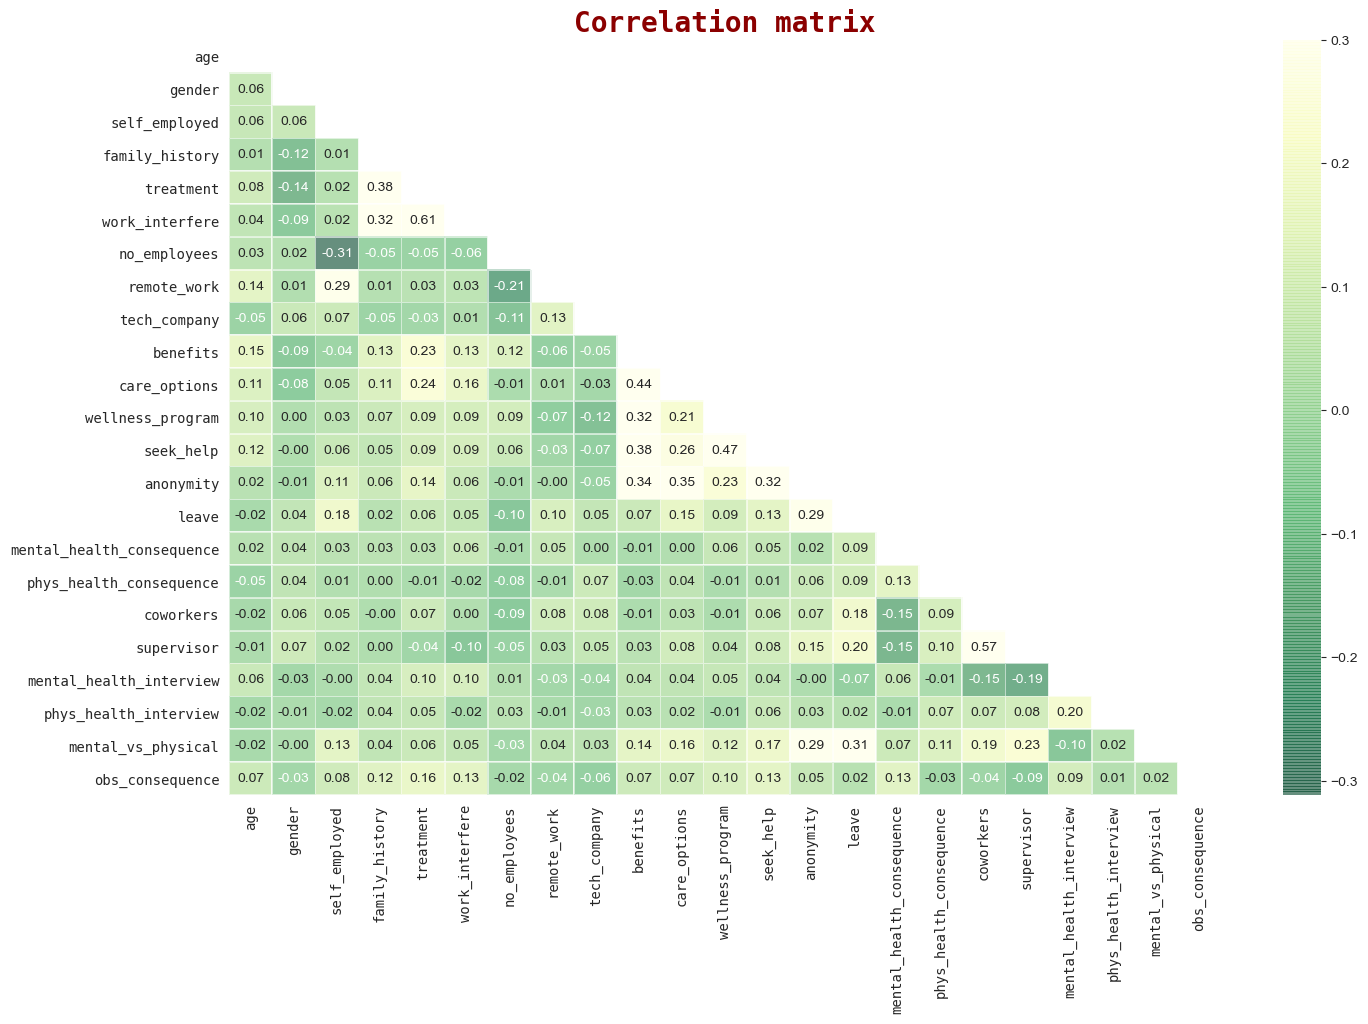

In [27]:
df1 = df.copy()

from sklearn.preprocessing import LabelEncoder
cols = df1.columns

encoder = LabelEncoder()
for col in cols:
    encoder.fit(df1[col])
    df1[col] = encoder.transform(df1[col])

plt.figure(figsize = (16, 10), dpi = 100)

corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            mask = mask,
            cmap = 'YlGn_r',
            vmax=.3,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            alpha = 0.6)

hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)

plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 20,
          weight = 'semibold',
          color = '#8B0000')

plt.show()